# <center> Раздел 2. Модуль 5. Визуализация данных

## <center> **Обзор типов диаграмм**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

### <center> 1. Линейный график

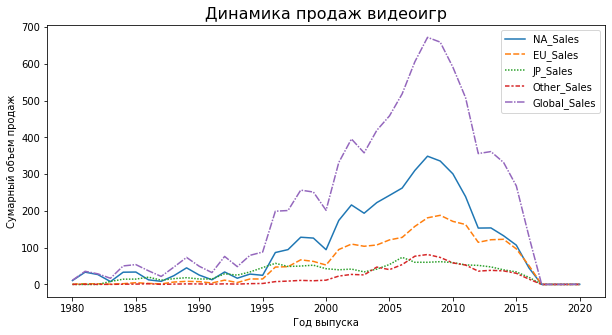

In [ ]:
vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Сумарный объем продаж');

Представляет собой последовательность точек, соединенных линией. Каждая точка - это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

На практике в Data Science такие графики чаще всего используются для визуализации временных рядов, например, чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций. 
График особенно бывает полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.


### <center> 2. Гистограмма

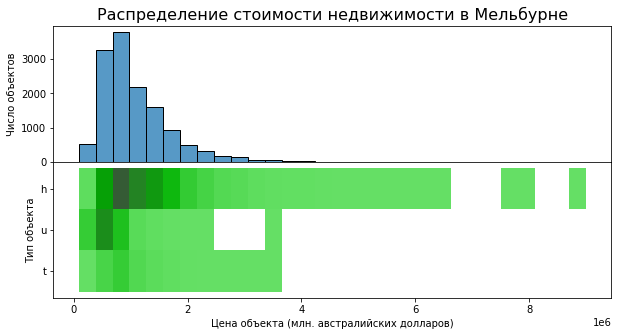

In [ ]:
melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта');

Гистограмма - это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x. Ось разбита на интервалы, их еще называют корзинами (bins), их число задается пользователем. Ширина интервалов одинакова и задает ширину прямоугольника. По оси y откладывается высота прямоугольника - количество наблюдений, которые попали в интервал, чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например, мы можем понять как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

### <center> 3. Диаграмма рассеяния

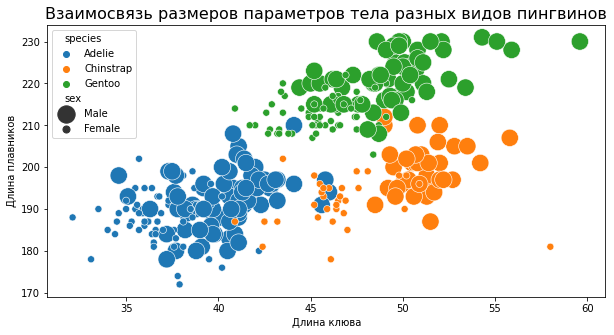

In [ ]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина плавников');

График представляет собой облака точек, по оси абсцисс откладывается одна числовая переменная, а по оси ординат - вторая, а каждая точка на графике - это запись из таблицы. 

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако, покопавшись в настройках графика, в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С помощью нее мы можем увидеть как зависит (или не зависит) давление от возраста пациента, объем продаж товаров от количества показанной рекламы и т.д. 
Оценив взаимосвязь признаков, мы можем принять решение, использовать ли какой-то из признаков для предсказания или нет.


### <center> 2.4. Boxplot

Коробчатые диаграммы, которые были введены в употребление Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей. Приведем общую схему построения диаграммы:


Основные составляющие графика:
1. **Ящик или коробка**. Левая граница коробки соответствует значению Q25, правая - Q75, а линия внутри коробки - медиане. Ширина ящика называется межквартильным размахом (Interquartile range) и вычисляется как IQR = Q75 -Q25. 
2. **Усы ящика**, длина которых равна 1.5 IQR. Крайние точки усов часто обозначаются в литературе как “min” и “max” и называются границами распределения. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.
3. **Потенциальные выбросы** - точки лежащие за пределами границ. Согласно теории Тьюки эти точки следует считать аномалиями и они подлежат исключению из данных. Однако, на практике так бывает не всегда и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

<img src= https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/изображение_2021-09-20_112110.png >

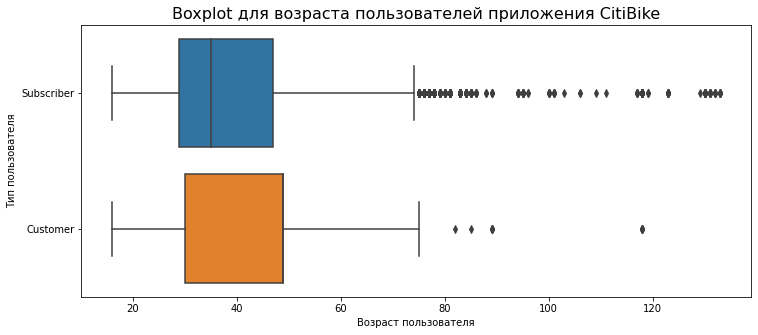

In [ ]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом: например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков). По своей применимости коробчатые диаграммы часто являются более совершенными аналогами гистограмм. 

### <center> 5. Круговая диаграмма

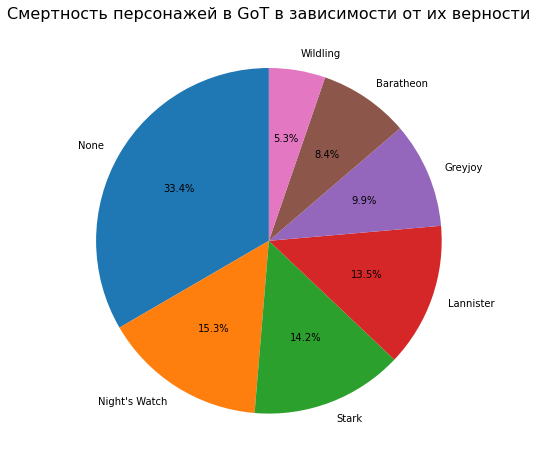

In [ ]:
game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Диаграмма представляет собой круг, разделенный на сектора. Весь круг составляет 100%. Каждый из секторов отображает долю одной из категорий в данных и размер сектора соответствует части целого от круга. 

Диаграмма является способом визуализации для категориального признака, например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

Однако специалисты и эксперты по визуализации обычно сторонятся круговых диаграмм и предпочитают им столбчатые диаграммы. Главная причина - столбчатые диаграммы могут быть более информативными.


### <center> 6. Столбчатая диаграмма

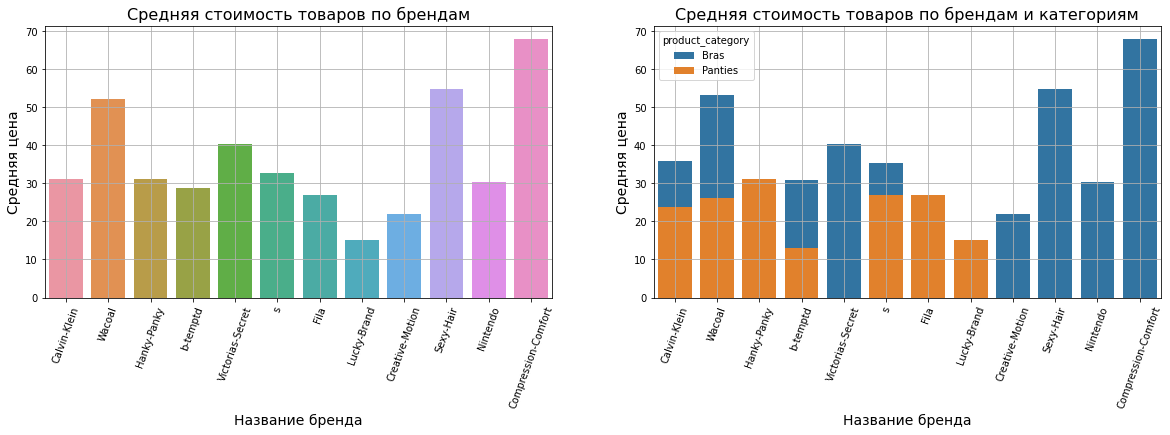

In [ ]:
amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b-temptd'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '', regex=True).astype('float64')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

Столбчатая диаграмма тоже максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science - это сравнить категории друг с другом. Например, сравнить рестораны по суммарной прибыли, сравнить средние расходы пользователей, медианную стоимость квартир по районам и т.д. 

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым, повышая информативность. Такие диаграммы называются многоуровневыми.


### <center> 7. Тепловая карта

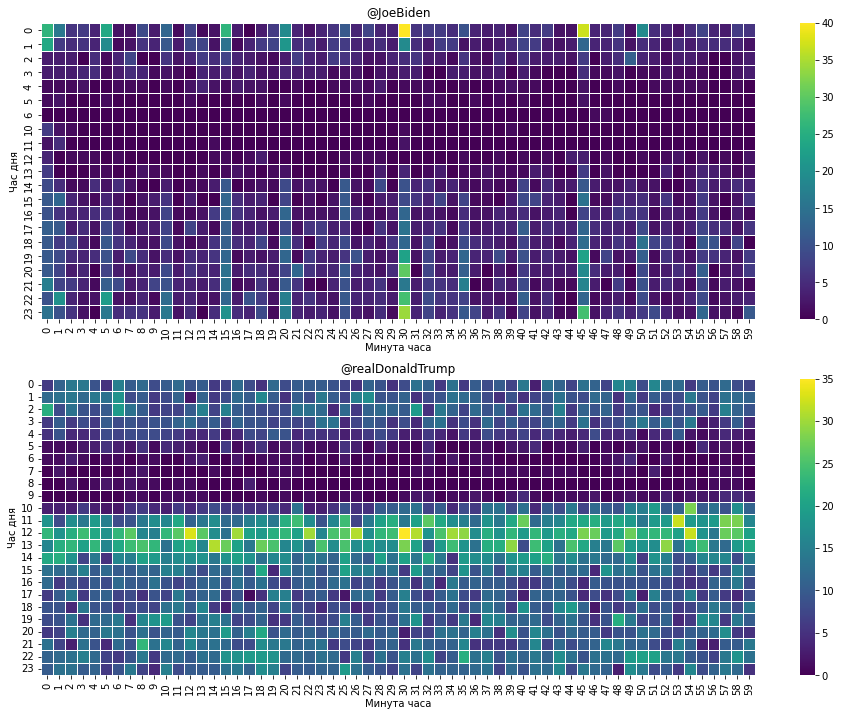

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тепловая карта - это графическое представление некоторой таблицы, где значения в ячейках таблицы выделяются определенным цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Применение тепловых карты очень различно: от визуализации категорий объектов на изображениях до графического представления матриц. При исследовании табличных данных они чаще всего применяются для визуализации сводных таблиц.


ОБЩИЕ РЕКОМЕНДАЦИИ К СОЗДАНИЮ ВИЗУАЛИЗАЦИИ

1
Первое и самое главное правило — график должен быть информативным и понятным. То есть любой человек, взглянув на ваш график, должен понять, что на нём изображено.

Для этого всегда подписывайте оси графика или сам график, делайте интервалы между отметками на осях, не используйте слишком много графиков на одной координатной плоскости.

2
Одна плоскость — один вид графика. Не стоит смешивать типы визуализации, это делает результат нечитабельным.

3
Принцип минимализма: чем проще график, тем лучше — не нужно добавлять сглаживающие кривые, многочисленные подписи, лишние отметки на осях, яркие, отвлекающие внимание цвета, если это не помогает вам донести идею.

4
Если тип значений всего один, легенда не нужна.

5
Не используйте сложный дизайн там, где это не требуется. Прежде чем строить для презентации 3D-график, подумайте, можно ли обойтись без него.

6
Если у вас несколько диаграмм, используйте единую цветовую гамму.

7
Время всегда указывается по горизонтальной оси слева направо. Размещайте отметки времени так, чтобы они не сливались друг с другом (например, под углом 45 градусов).

8
При построении графиков необходимо отталкиваться от их предназначения: например, не надо строить линейный график на категориальных данных — он не предназначен для этого.

СТОЛБЧАТАЯ ДИАГРАММА

Столбчатая диаграмма (bar plot) — один из самых популярных видов графиков, однако не все исследователи используют его правильно.

→ Столбчатая диаграмма используется, когда необходимо сравнить какой-то показатель (количество, среднее, медиану) в зависимости от категориального признака (возможен вариант сравнения по датам). Это часто помогает понять, каково соотношение категорий, какая категория доминирующая. Всё это можно учитывать при построении модели, чтобы делать прогнозы более точными.

СОВЕТЫ

Не сравнивайте больше десяти категорий друг с другом с помощью столбчатой диаграммы — вам будет сложно ориентироваться в ней, особенно если диаграмма многоуровневая.

Если категорий слишком много, можно использовать иерархическую диаграмму или попробовать отразить диаграмму горизонтально (поменять параметры x и y местами). 

Ещё один вариант — объединить непопулярные категории в общую категорию «другие».

Начало точки отсчёта для значений показателя всегда 0.

Если у вас есть значения меньше 0, используйте горизонтальную столбчатую диаграмму.

ЛИНЕЙНЫЙ ГРАФИК

→ Линейный график (linear plot) отлично подходит, если набор данных непрерывен (как мы уже видели раньше, обычно это временной ряд). График используется для определения тенденций во временном ряду и сравнения нескольких рядов между собой.

СОВЕТЫ

Не используйте график, если набор данных дискретный (менее 20 наблюдений) — в таком случае лучше воспользуйтесь столбчатой диаграммой.

Время всегда отображается по оси абсцисс и разбивается на равные интервалы.

Если даты сливаются, используйте наклон в 45 градусов.
Не используйте график для сравнения рядов, если их больше 7-10 — график станет нечитабельным. Попробуйте уменьшить число категорий.

Например, если вам необходимо сравнить графики продаж по странам (а их у вас около 200), добавьте признак региона (например, Азия, Европа, Северная Америка и т. д.) и сравнивайте временные ряды в его разрезе. Когда вы выявите лидера по продажам среди регионов, можете вернуться к сравнению стран внутри этого региона.

ГИСТОГРАММА

→ Гистограммы (histogram) часто применяются для разведывательного анализа данных (EDA), так как они дают информацию о распределении признака. С их помощью можно сразу определить диапазон изменения признака, его модальное значение (пик гистограммы), а также найти «пеньки», которые выбиваются от непрерывного распределения гистограммы, — аномалии.

СОВЕТЫ

Не стоит строить гистограмму, если наблюдений мало — распределение окажется далёким от действительного и вы просто сделаете ложные выводы. По статистике, для того, чтобы гистограмма хоть как-то оценивала истинное распределение, нужно как минимум 30 наблюдений (на практике нужно хотя бы 100).

Попробуйте (ради эксперимента) построить пять-семь гистограмм на одном графике для их сравнения по категориям (например, страны). ⛔ На практике так делать не нужно. Для сравнения параметров распределений по категориям предназначена коробчатая диаграмма (boxplot).

Если вы всё же хотите сравнить гистограммы между собой, предварительно обязательно приведите признаки к одной шкале (мы делали это, когда сравнивали ежедневную заболеваемость коронавирусом в процентах от населения страны). Если этого не сделать, распределения окажутся несопоставимыми.

Например, что значит 1 млн заболевших в день для Китая с населением в 1.5 млрд человек? А что значит такая же цифра для Ватикана, население которого меньше 1 тыс. человек? Вероятно, суть ясна.

После того как вы привели все признаки к одной шкале, лучше используйте цветовую гистограмму, которая показывает частоту интенсивностью цвета (загляните в юнит по Seaborn, если забыли). Да, она не покажет высоту столбцов в цифрах, но зато вы сможете визуально сравнить категории между собой и избежать наложения гистограмм друг на друга.

ДИАГРАММА РАССЕЯНИЯ

→ Диаграмма рассеяния (scatter plot) и её производные — jointplot (гистограммы с рассеянием), kdeplot (диаграмма плотностей) и bubble plot (пузырьковая диаграмма) — предназначены для выявления взаимосвязи между двумя (или в случае 3D — тремя) признаками.

Можно добавлять в график расцветку по одному категориальному признаку, а тип или размер маркеров — по другому. Итого мы сможем наблюдать взаимосвязь нескольких признаков (до пяти).

СОВЕТЫ

Не используйте диаграммы рассеяния на маленьком наборе данных. Здесь ситуация та же, что и с гистограммами.

Не стоит использовать расцветку и размер точек для признаков с большим числом уникальных категорий.

В случае если вы не видите зависимостей в данных, попробуйте использовать логарифмическую шкалу по оси абсцисс (по оси абсцисс и ординат в случае 3D-графика). Во всех библиотеках в методе есть параметр log, значение которого нужно установить на True.

?
Почему логарифмическая шкала?

Ответ, конечно же, кроется в математике. Если говорить, не вдаваясь в подробности, функция логарифма, во-первых, отбрасывает отрицательные значения, а во-вторых, «приземляет» более высокие значения — зависимость становится более гладкой, и её становится легче просматривать. При этом логарифмирование не искажает исходную зависимость: то есть если на исходных данных был тренд роста признака А от признака Б, то на логарифмированных данных этот тренд сохранится.

КРУГОВАЯ ДИАГРАММА

→ Круговая диаграмма (pie chart) показывает структуру признака, то есть процентную долю каждого из возможных значений признака. 

Вы можете столкнуться с ней, например, когда захотите отобразить соотношение классов в данных или вклад отдельных компонентов в общую прибыль.

СОВЕТЫ

Сумма значений в круге всегда должна равняться единице, то есть всегда должно быть целое и его части (например, отношение числа заболевших вирусом по странам к общему количеству населения).

С помощью круговой диаграммы нельзя сравнить средний чек в ресторанах — эти средние не являются частью единого целого. Однако можно сравнить число сотрудников в этих ресторанах, так как они являются частью одной совокупности.

Не визуализируйте секторы, близкие к 0, — их невозможно сравнить друг с другом.

Не делайте больше 6-8 секторов — воспринимать информацию будет сложно. Если компонентов больше, выделите ТОП-6-8, а остальные обозначьте как «прочие».

Всегда отображайте легенду либо подписи категорий внутри секторов.
Если важно выделить часть графика, «вытащите» его из центра.

СХЕМА ВЫБОРА ТИПА ВИЗУАЛИЗАЦИИ

Наконец, в завершение темы визуализации предлагаем вам ознакомиться со схемой, на которую вы можете ориентироваться при выборе типа визуализации для своих реальных задач:

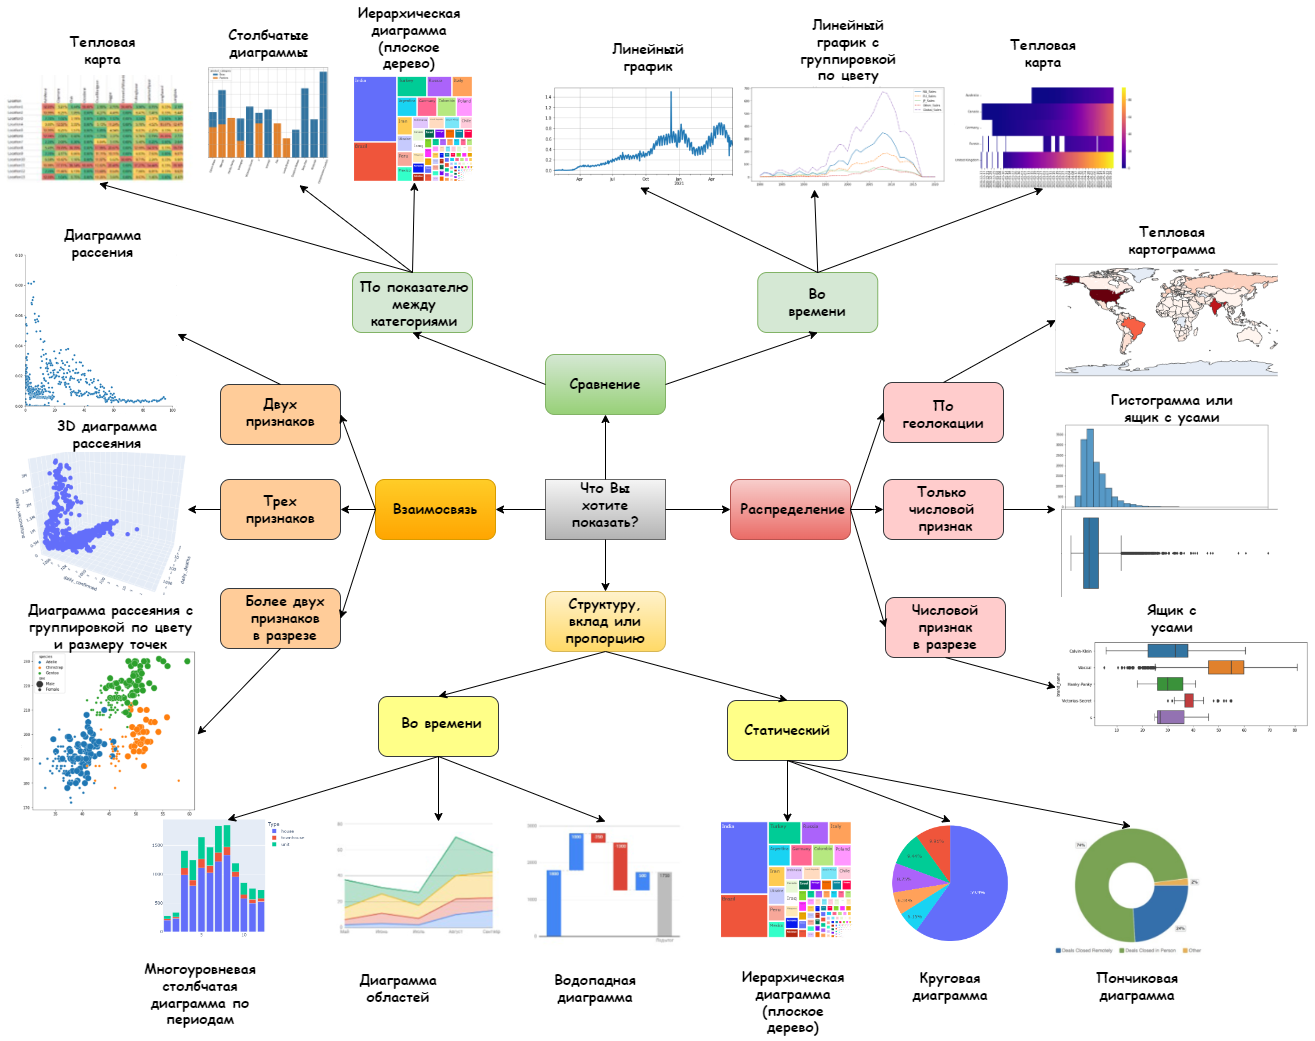

https://viewer.diagrams.net/#P%7B%22client%22%3A1%2C%22target%22%3A%22blank%22%2C%22edit%22%3A%22_blank%22%2C%22close%22%3A1%2C%22layers%22%3A1%2C%22nav%22%3A1%2C%22highlight%22%3A%220000ff%22%7D

https://drive.google.com/file/d/1WMFK5Y43LXhDCHBp1gagxqyKHoMUmYBT/view?usp=drive_link